<a href="https://colab.research.google.com/github/SkyJoyTianle/python/blob/master/5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 第五章

In [ ]:
import numpy as np
from scipy.stats import kde
import itertools
import math
import matplotlib.pyplot as plt
from matplotlib import style
style.use("seaborn-ticks")

例 71

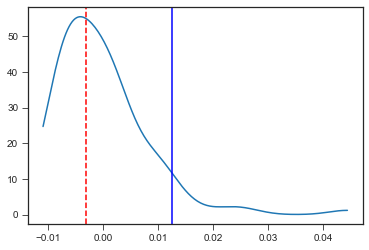

In [ ]:
sigma = 1
def k(x, y):
    return np.exp(-(x - y)**2 / sigma**2)
# Data generation
n = 100
xx = np.random.randn(n)
yy = np.random.randn(n)      # same distribution
#yy = 2 * np.random.randn(n) # different distribution
x = xx; y = yy

T = []
for h in range(100):
    index1 = np.random.choice(n, size = int(n/2), replace = False)
    index2 = [x for x in range(n) if x not in index1]
    x = list(xx[index2]) + list(yy[index1])
    y = list(xx[index1]) + list(yy[index2])
    S = 0
    for i in range(n):
        for j in range(n):
            if i != j:
                S = S + k(x[i], x[j]) + k(y[i], y[j]) \
                    - k(x[i], y[j]) - k(x[j], y[i])
    T.append(S / n / (n - 1))
v = np.quantile(T, 0.95)

S = 0
for i in range(n):
    for j in range(n):
        if i != j:
            S = S + k(x[i], x[j]) + k(y[i], y[j]) \
                - k(x[i], y[j]) - k(x[j], y[i])
u = S / n / (n - 1)

x = np.linspace(min(min(T), u, v), max(max(T), u, v), 200)
density = kde.gaussian_kde(T)
plt.plot(x, density(x))
plt.axvline(x = u, c = "r", linestyle = "--")
plt.axvline(x = v, c = "b")

例 73

<ipython-input-3-808ab27f4eed>:21: ComplexWarning: Casting complex values to real discards the imaginary part
  z.append(np.longdouble(1/n*(np.sum(lam[0:r]


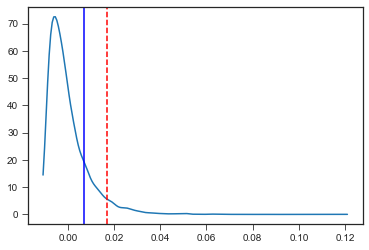

In [ ]:
sigma = 1
def k(x, y):
    return np.exp(-(x - y)**2 / sigma**2)
# Data generation
n = 100
x = np.random.randn(n)
y = np.random.randn(n)      # same distribution
#y = 2 * np.random.randn(n) # different distribution

K = np.zeros((n, n))
for i in range(n):
    for j in range(n):
            K[i ,j] = k(x[i], x[j]) + k(y[i], y[j]) \
                - k(x[i], y[j]) - k(x[j], y[i])
lam, vec = np.linalg.eig(K)
lam = lam / n

r = 20
z = []
for h in range(10000):
    z.append(np.longdouble(1/n*(np.sum(lam[0:r]
    *(np.random.chisquare(df = 1, size = r)-1)))))

v = np.quantile(z, 0.95)

S = 0
for i in range(n - 1):
    for j in range(i + 1, n):
        S = S + k(x[i], x[j]) + k(y[i], y[j]) \
            - k(x[i], y[j]) - k(x[j], y[i])
u = np.longdouble(S / n / (n - 1))

x = np.linspace(min(min(z), u, v), max(max(z), u, v), 200)

density = kde.gaussian_kde(z)
plt.plot(x, density(x))

plt.axvline(x = v, c = "r", linestyle = "--")
plt.axvline(x = u, c = "b")



系 2

In [ ]:
# def HSIC_1(x, y, k_x, k_y):
#     n = len(x)
#     S = 0
#     for i in range(n):
#         for j in range(n):
#             S = S + k_x(x[i], x[j])*k_y(y[i], y[j])
#     T = 0
#     for i in range(n):
#         T_1 = 0
#         for j in range(n):
#             T_1 = T_1 + k_x(x[i], x[j])
#         T_2 = 0
#         for l in range(n):
#             T_2 = T_2 + k_y(y[i], y[l])
#         T = T + T_1 * T_2
#     U = 0
#     for i in range(n):
#         for j in range(n):
#             U = U + k_x(x[i], x[j])
#     V = 0
#     for i in range(n):
#         for j in range(n):
#             V = V + k_y(y[i], y[j])
#     return S/n**2-2*T/n**3+U*V/n**4

In [ ]:
def HSIC_1(x, y, k_x, k_y):
    n = len(x)
    K_x = np.zeros((n, n))
    for i in range(n):
        for j in range(n):
            K_x[i, j] = k_x(x[i], x[j])
    K_y = np.zeros((n, n))
    for i in range(n):
        for j in range(n):
            K_y[i, j] = k_y(y[i], y[j])
    E = np.ones((n, n))
    H = np.identity(n) - E/n
    return np.sum(np.diag(np.diag(K_x.dot(H).dot(K_y).dot(H)))) / n**2

例 76

In [ ]:
def k_x(x, y):
    return np.exp(-np.linalg.norm(x - y)**2/2)
k_y = k_x
k_z = k_x
n = 100
for a in [0, 0.1, 0.2, 0.4, 0.6, 0.8]:
    x = np.random.randn(n)
    z = np.random.randn(n)
    y = a * x + np.sqrt(1 - a**2) * z
    print(HSIC_1(x, y, k_x, k_y))

0.0023666294202516203
0.0024999468801231717
0.000833375824298932
0.009921766894672612
0.019266740643597513
0.034408949042521175


In [ ]:
def HSIC_2(x, y, z, k_x, k_y, k_z):
    n = len(x)
    S = 0
    for i in range(n):
        for j in range(n):
            S = S + k_x(x[i], x[j]) * k_y(y[i], y[j]) \
            * k_z(z[i], z[j])
    T = 0
    for i in range(n):
        T_1 = 0
        for j in range(n):
            T_1 = T_1 + k_x(x[i], x[j])
        T_2 = 0
        for l in range(n):
            T_2 = T_2 + k_y(y[i], y[l]) * k_z(z[i], z[j])
        T = T + T_1 * T_2
    U = 0
    for i in range(n):
        for j in range(n):
            U = U + k_x(x[i], x[j])
    V = 0
    for i in range(n):
        for j in range(n):
            V = V + k_y(y[i], y[j]) * k_z(z[i], z[j])
    return S/n**2-2*T/n**3+U*V/n**4

例 77

In [ ]:
def cc(x, y):
    return np.sum(np.dot(x.T, y)) / len(x)

def f(u, v):
    return u - cc(u, v)/cc(v, v) * v

In [ ]:
#Data generation
n = 30
x = np.random.randn(n)**2-np.random.randn(n)**2
y = 2 * x + np.random.randn(n)**2 - np.random.randn(n)**2
z = x + y +np.random.randn(n)**2 - np.random.randn(n)**2
x = x - np.mean(x)
y = y - np.mean(y)
z = z - np.mean(z)

# top
def cc(x, y):
    return np.sum(np.dot(x.T, y)/len(x))

def f(u, v):
    return u - cc(u, v)/cc(v, v) * v

x_y = f(x, y); y_z = f(y, z); z_x = f(z, x)
x_z = f(x, z); z_y = f(z, y); y_x = f(y, x)

v1 = HSIC_2(x, y_x, z_x, k_x, k_y, k_z)
v2 = HSIC_2(y, z_y, x_y, k_y, k_z, k_x)
v3 = HSIC_2(z, x_z, y_z, k_z, k_x, k_y)

if v1 < v2:
    if v1 < v3:
        top = 1
    else:
        top = 3
else:
    if v2 < v3:
        top = 2
    else:
        top = 3

#bottom
x_yz = f(x_y, z_y)
y_zx = f(y_z, x_z)
z_xy = f(z_x, y_x)

if top == 1:
    v1 = HSIC_1(y_x, z_xy, k_y, k_z)
    v2 = HSIC_1(z_x, y_zx, k_z, k_y)
    if v1 < v2:
        middle = 2
        bottom = 3
    else:
        middle = 3
        bottom = 2
if top == 2:
    v1 = HSIC_1(z_y, x_yz, k_y, k_z)
    v2 = HSIC_1(x_y, z_xy, k_z, k_y)
    if v1 < v2:
        middle = 3
        bottom = 1
    else:
        middle = 1
        bottom = 3

if top == 3:
    v1 = HSIC_1(z_y, x_yz, k_z, k_x)
    v2 = HSIC_1(x_y, z_xy, k_x, k_z)
    if v1 < v2:
        middle = 1
        bottom = 2
    else:
        middle = 2
        bottom = 1
#result
print("top = ", top)
print("middle = ", middle)
print("bottom = ", bottom)

top =  3
middle =  2
bottom =  1


例 78

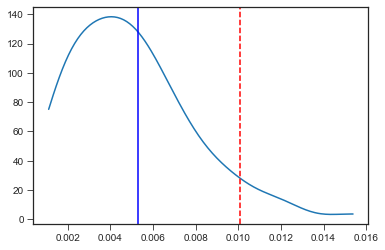

In [ ]:
# Data generation
x = np.random.randn(n)
y = np.random.randn(n)
u = HSIC_1(x, y, k_x, k_y)

m = 100
w = []
for i in range(m):
    x = x[np.random.choice(n, n, replace = False)]
    w.append(HSIC_1(x, y, k_x, k_y))

v = np.quantile(w, 0.95)


x = np.linspace(min(min(w), u, v), max(max(w), u, v), 200)

density = kde.gaussian_kde(w)
plt.plot(x, density(x))

plt.axvline(x = v, c = "r", linestyle = "--")
plt.axvline(x = u, c = "b")


In [ ]:
def h(i, j, q, r, x, y, k_x, k_y):
    M = list(itertools.combinations([i, j, q, r], 4))
    m = len(M)
    S = 0
    for j in range(m):
        t = M[j][0]
        u = M[j][1]
        v = M[j][2]
        w = M[j][3]
        S = S + k_x(x[t], x[u])*k_y(y[t], y[u])\
        + k_x(x[t], x[u])*k_y(y[v], y[w]) \
        - 2 * k_x(x[t], x[u])*k_y(y[t], y[v])
    return S / m

def HSIC_U(x, y, k_x, k_y):
    M = list(itertools.combinations(range(n), 4))
    m = len(M)
    S = 0
    for j in range(m):
        S = S + h(M[j][0], M[j][1], M[j][2], M[j][3],
                  x, y, k_x, k_y)
    return S / math.comb(n, 4)

[9.43372312e-03 7.60184058e-03 6.84791271e-03 4.71833989e-03
 2.91610998e-03 2.58505938e-03 2.57260480e-03 2.14716454e-03
 1.52927314e-03 1.40680064e-03 1.30527061e-03 1.03809542e-03
 8.17408141e-04 6.63885663e-04 5.98972166e-04 5.18116129e-04
 4.66211054e-04 3.33278079e-04 3.08102237e-04 2.52215392e-04
 2.08148331e-04 2.01305856e-04 1.61855802e-04 1.24737146e-04
 9.77431144e-05 9.05299170e-05 6.74173717e-05 5.94551451e-05
 4.79841522e-05 3.68125212e-05 3.47962810e-05 2.59468073e-05
 2.27016212e-05 1.75277782e-05 1.44134018e-05 1.34476814e-05
 1.07720204e-05 8.32532742e-06 8.02962726e-06 6.61660031e-06
 6.03329520e-06 4.82571716e-06 4.39769787e-06 3.07993953e-06
 2.92646288e-06 1.93843247e-06 1.43720831e-06 1.32156280e-06
 1.21961656e-06 9.39545869e-07 8.74760924e-07 6.82246149e-07
 6.17680338e-07 5.35249706e-07 4.13572087e-07 2.89912505e-07
 2.63638065e-07 2.13422066e-07 1.43007791e-07 1.39668484e-07
 1.11861810e-07 9.06782617e-08 8.18246166e-08 5.59605198e-08
 4.96061526e-08 4.031848

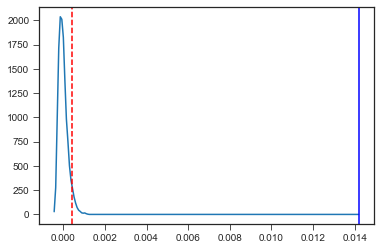

In [ ]:
sigma = 1

def k(x, y):
    return np.exp(-(x-y)**2/sigma**2)

k_x = k; k_y = k

n = 100; x = np.random.randn(n)
a = 0 ##independent
#a = 0.2 ##correlated coefficient 0.2
y = a*x + np.sqrt(1 - a**2) * np.random.randn(n)
#y = np.random.randn(n)*2 ## different distribution

K_x = np.zeros((n, n))
for i in range(n):
    for j in range(n):
        K_x[i ,j] = k_x(x[i], x[j])
K_y = np.zeros((n, n))
for i in range(n):
    for j in range(n):
        K_y[i, j] = k_y(y[i], y[j])
F = np.zeros(n)
for i in range(n):
    F[i] = np.sum(K_x[i, :]) / n
G = np.zeros((n))
for i in range(n):
    G[i] = np.sum(K_y[i, :]) / n
H = np.sum(F) / n
I = np.sum(G) / n
K = np.zeros((n, n))
for i in range(n):
    for j in range(n):
        K[i, j] = (K_x[i, j] - F[i] - F[j] + H) \
        * (K_y[i, j] - G[i] - G[j] + I) / 6
r = 20
lam, vec = np.linalg.eig(K)
lam = lam / n
print(lam)
z = []
for s in range(10000):
    z.append(1/n*(np.sum(lam[0:r]*(np.random.chisquare(df = 1, size = r)-1))))
v = np.quantile(z, 0.95)

u = HSIC_U(x, y, k_x, k_y)

x = np.linspace(min(min(z), u, v), max(max(z), u, v), 200)

density = kde.gaussian_kde(z)
plt.plot(x, density(x))

plt.axvline(x = v, c = "r", linestyle = "--")
plt.axvline(x = u, c = "b")

例 79

(100, 100)


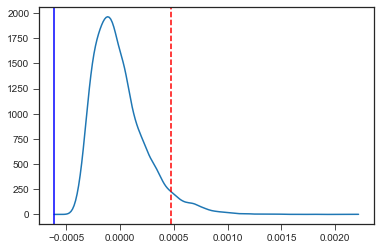

In [ ]:
sigma = 1

def k(x, y):
    return np.exp(-(x-y)**2/sigma**2)

k_x = k; k_y = k

#Data generation
n = 100
x = np.random.randn(n)
a = 0    ## independent
#a = 0.2 ## correlated coefficient 0.2
y = a*x + np.sqrt(1- a**2)*np.random.randn(n)
# y =np.random.randn(n)

K_x = np.zeros((n, n))
for i in range(n):
    for j in range(n):
        K_x[i, j] = k_x(x[i], x[j])
K_y = np.zeros((n, n))
for i in range(n):
    for j in range(n):
        K_y[i, j] = k_y(y[i], y[j])

F = np.zeros(n)
for i in range(n):
    F[i] = np.sum(K_x[i, :]) / n

G = np.zeros(n)
for i in range(n):
    G[i] = np.sum(K_y[i, :]) / n

H = np.sum(F) / n
I = np.sum(G) / n
K = np.zeros((n, n))
for i in range(n):
    for j in range(n):
        K[i, j] = (K_x[i, j] - F[i] - F[j] + H)\
                  *(K_y[i, j] - G[i] - G[j] + I)/6
print(K.shape)
r = 20
lam, vec = np.linalg.eig(K)
lam = lam / n
z = []
for s in range(10000):
    z.append(1/n*(np.sum(lam[0:r]*(np.random.chisquare(df = 1, size = r)-1))))
v = np.quantile(z, 0.95)

u = HSIC_U(x, y, k_x, k_y)

x = np.linspace(min(min(z), u, v), max(max(z), u, v), 200)

density = kde.gaussian_kde(z)
plt.plot(x, density(x))

plt.axvline(x = v, c = "r", linestyle = "--")
plt.axvline(x = u, c = "b")

